In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import numpy as np
import networkx as nx
import csv

In [146]:
# Load data
data = pd.read_csv('final_processed_movies.csv',header=0)

# 1. Histogram of Movie Popularity

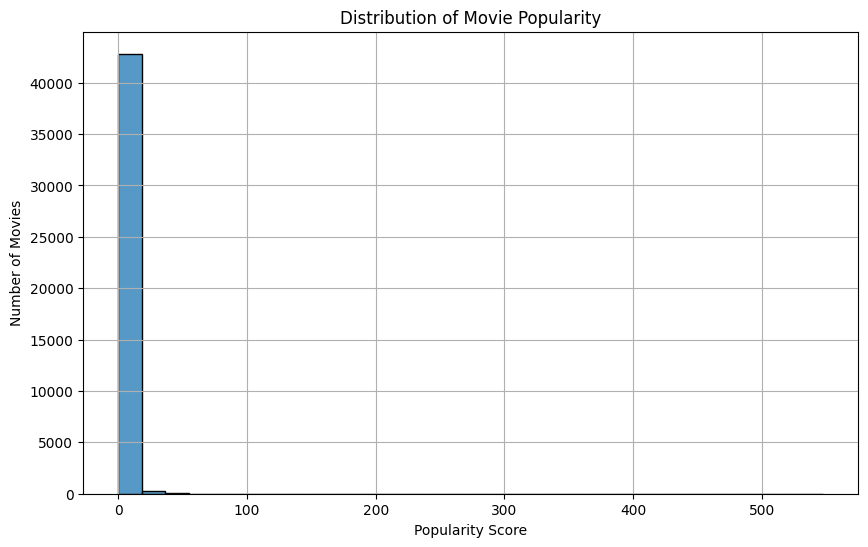

In [147]:
# Ensure 'popularity' is treated as a numeric column
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'].dropna(), bins=30, kde=False)  # Drop NA values for safety
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 1.1. Histogram of Movie Popularity (Log Scale)

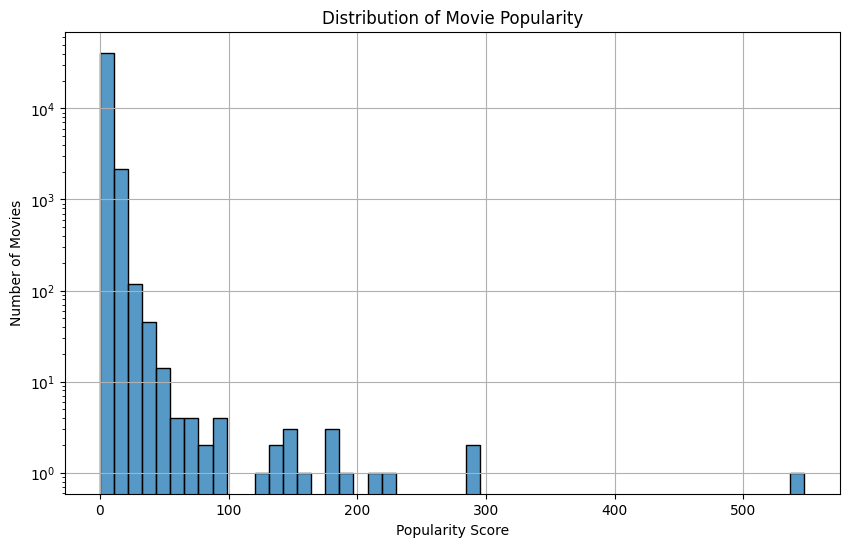

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'popularity' is treated as a numeric column
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'].dropna(), bins=50, kde=False)  # Drop NA values for safety
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()


# 2. Scatter Plot of Revenue vs. Budget

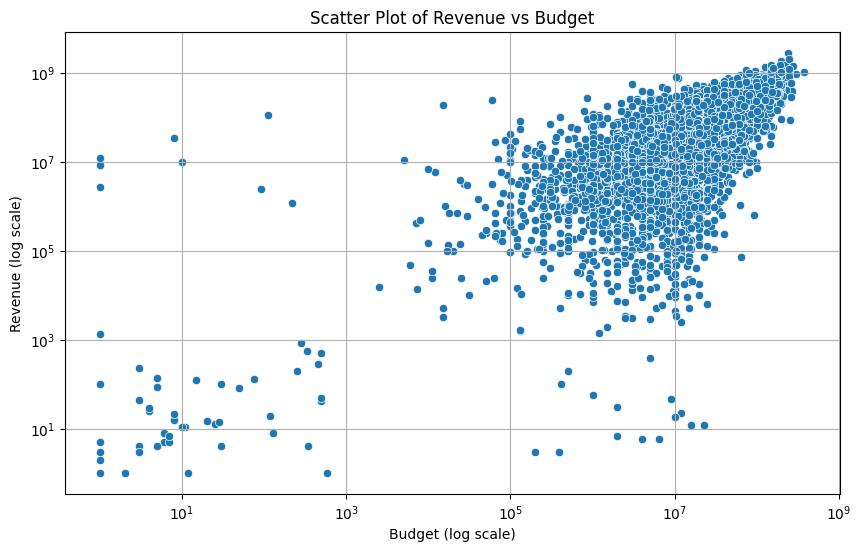

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Revenue vs Budget')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.grid(True)
plt.show()

# 2.1. Scatter Plot of Revenue vs. Budget [Filtered]

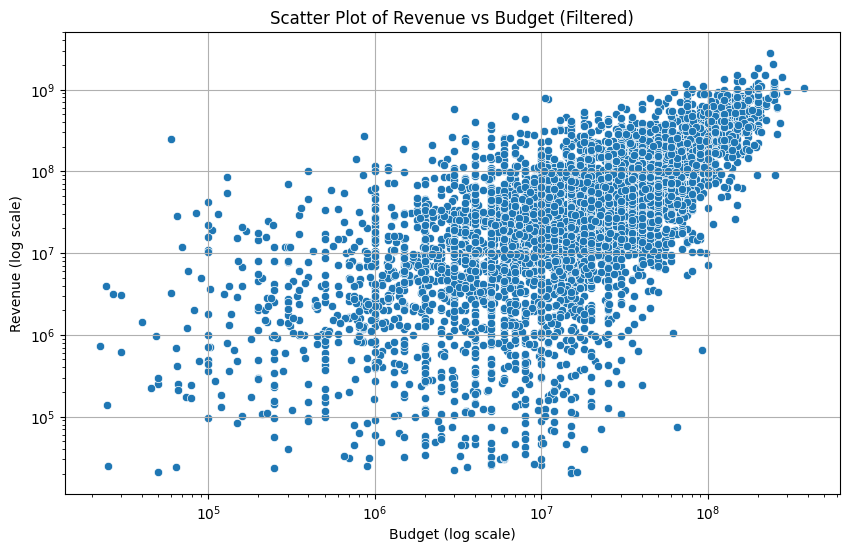

In [150]:
# Filter the data to include only rows where 'budget' and 'revenue' are greater than 20,000
filtered_data = data[(data['budget'] > 20000) & (data['revenue'] > 20000)]

# Now create the scatter plot using the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=filtered_data)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Revenue vs Budget (Filtered)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.grid(True)
plt.show()


# 2.2. Scatter Plot of Revenue vs. Budget [Filtered] + Colour

C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\461847092.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\461847092.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



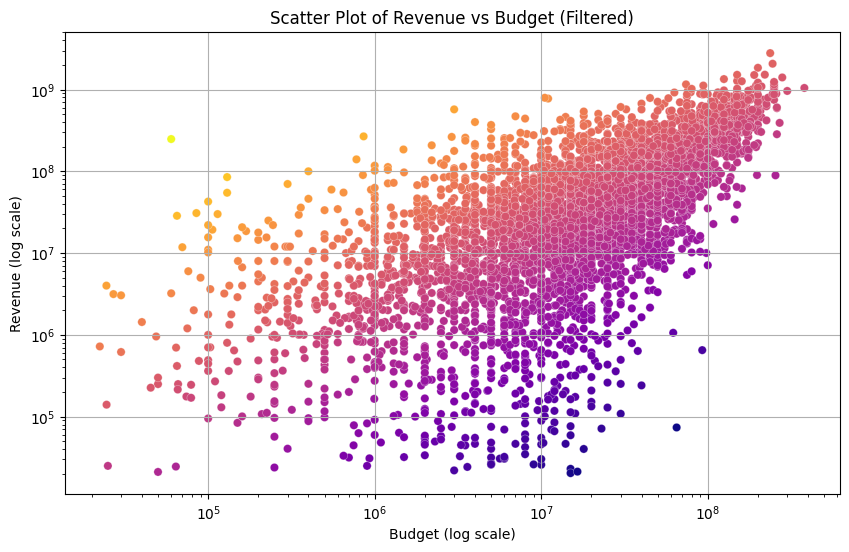

In [151]:
# Calculate profitability ratio using .loc for safe setting
filtered_data.loc[:, 'profitability'] = filtered_data['revenue'] / filtered_data['budget']

# Calculate the log of profitability and normalize it
profitability_normalized = np.log10(filtered_data['profitability'])  # Use log scale if the range is very large
max_val = profitability_normalized.max()
min_val = profitability_normalized.min()

# Use .loc to set the new column safely
filtered_data.loc[:, 'profitability_normalized'] = (profitability_normalized - min_val) / (max_val - min_val)

# Now create the scatter plot using the filtered data
plt.figure(figsize=(10, 6))

# Create a scatter plot with a color gradient that represents the normalized profitability
sns.scatterplot(x='budget', y='revenue', hue='profitability_normalized',
                palette='plasma', data=filtered_data, edgecolor=(1, 1, 1, 0.4), legend=False)

plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Revenue vs Budget (Filtered)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.grid(True)

plt.show()


# 3. Correlation Heatmap of Numeric Features

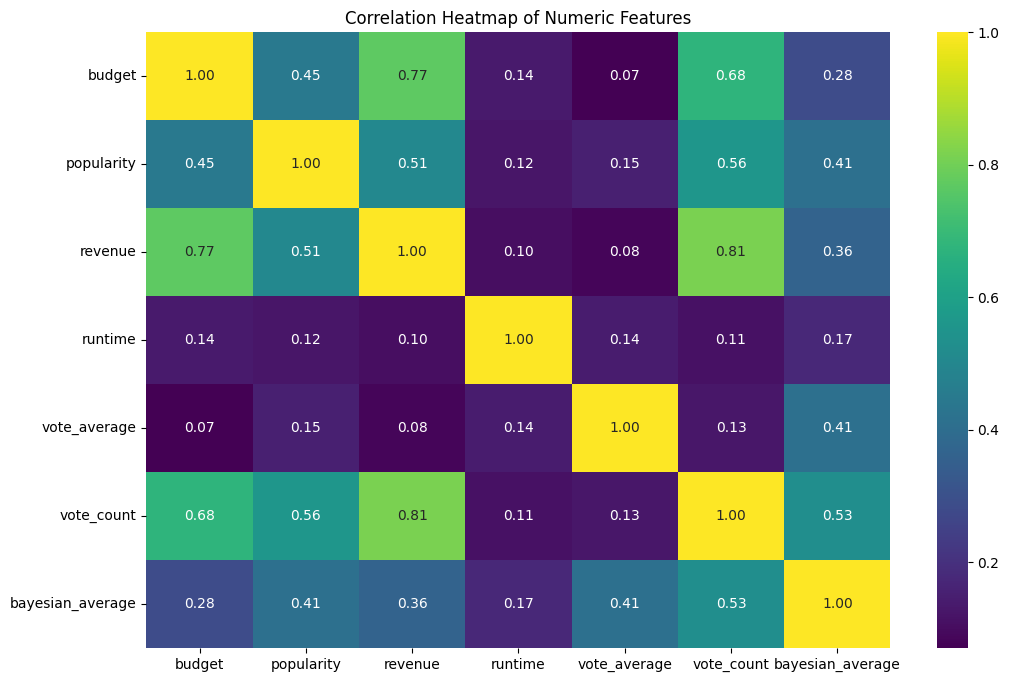

In [152]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 5. Word Cloud of Actors Names

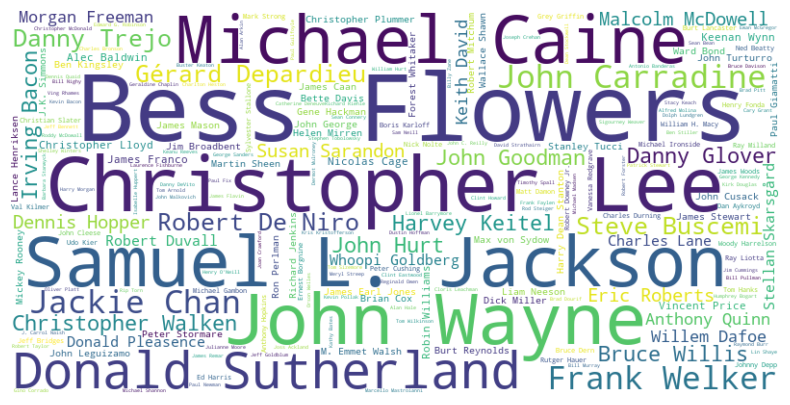

In [153]:
names = data[['actor_names']]

actors = []

for index, row in names.iterrows():
    for name in row['actor_names'].split("', '"):
        actors.append(name.strip("['']"))


for i in range(len(actors)):
    parts = actors[i].split("', \"")
    if len(parts) > 1:
        actors[i] = parts[0]
        actors.append(parts[1])

for i in range(len(actors)):
    parts = actors[i].split("\", '")
    if len(parts) > 1:
        actors[i] = parts[0]
        actors.append(parts[1])

# Step 3: Count word frequencies
word_counts = pd.Series(actors).value_counts()

# Step 4: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5. Word Cloud of Actors First Names (2000-2017)

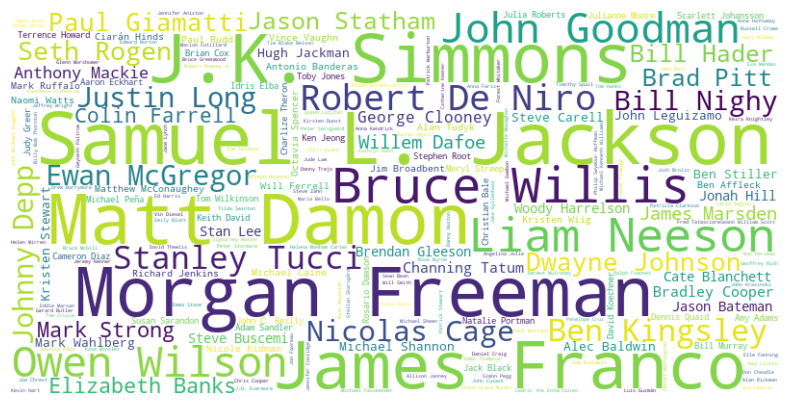

In [166]:
data['year'] = pd.to_datetime(data['release_date']).dt.year

# Filter data for the years 2005 to 2017
filtered_data = data[(data['year'] >= 2000) & (data['year'] <= 2017)]

names = filtered_data[['actor_names']]

actors = []

for index, row in names.iterrows():
    for name in row['actor_names'].split("', '"):
        actors.append(name.strip("['']"))

for i in range(len(actors)):
    parts = actors[i].split("', \"")
    if len(parts) > 1:
        actors[i] = parts[0]
        actors.append(parts[1])

for i in range(len(actors)):
    parts = actors[i].split("\", '")
    if len(parts) > 1:
        actors[i] = parts[0]
        actors.append(parts[1])

# Step 3: Count word frequencies
word_counts = pd.Series(actors).value_counts()

# Step 4: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud of Directors Names

In [199]:
names = data[['job_name_pairs']]
names

pairs = []

for index, row in names.iterrows():
    for name in row['job_name_pairs'].split("], ["):
        pairs.append(name.strip("['']").split("', '"))

with open('test.csv', "w", newline="") as file:
    writer = csv.writer(file)
    for item in pairs:
        try:
            writer.writerow([item])
        except:
            continue

jobs = []
directors = []

for pair in pairs:
    if pair[0] not in jobs:
        jobs.append(pair[0])
    if pair[0] == "Director":
        directors.append(pair[1])

print(jobs)

['Director', 'Screenplay', 'Producer', 'Executive Producer', 'Editor', 'Art Direction', 'Foley Editor', 'Animation', 'ADR Editor', 'Orchestrator', 'Color Timer', 'CG Painter', 'Original Story', 'Post Production Supervisor', 'Sculptor', 'Animation Director', 'Music', 'Layout', 'Music Editor', 'Negative Cutter', 'Title Designer', 'Supervising Technical Director', 'Songs', 'Supervising Animator', 'Sound Designer', 'Production Supervisor', 'Executive Music Producer', 'Visual Effects Supervisor', 'Visual Effects', 'Lighting Supervisor', 'Character Designer', 'Set Dresser\', "Kelly O\'Connell"', 'Set Dresser', 'Editorial Manager', 'Assistant Editor', 'Editorial Coordinator', 'Production Coordinator', 'Unit Publicist', 'Sound Re-Recording Mixer', 'Supervising Sound Editor', 'Sound Effects Editor', 'Sound Design Assistant', 'Assistant Sound Editor', 'Casting Consultant', 'ADR Voice Casting', 'Original Music Composer', 'Casting', 'Animation Supervisor', 'Production Design', 'Director of Photogr

# Top 50 Countries by Average Film Score

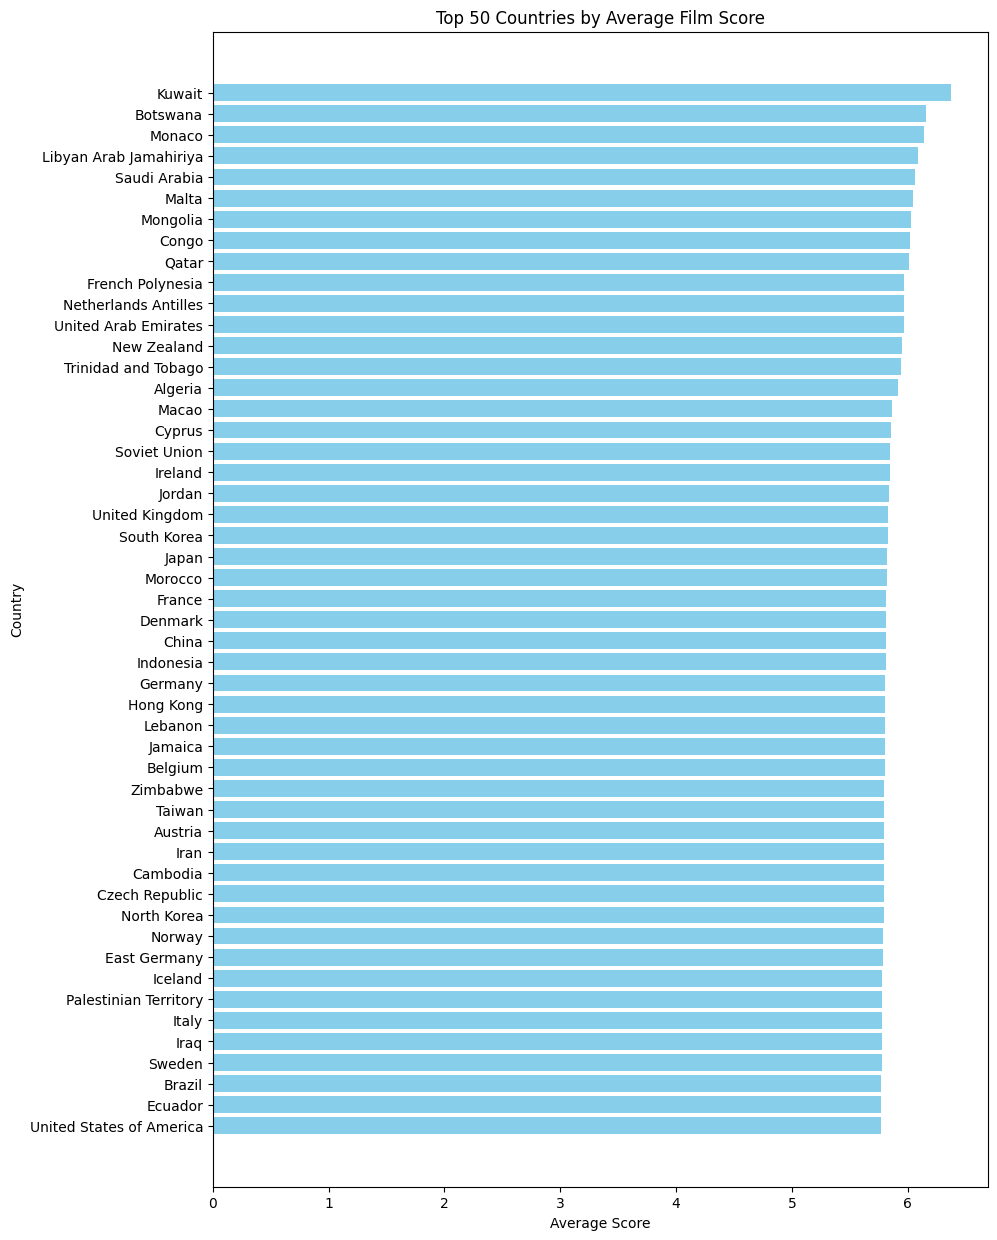

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load your data here
# data = pd.read_csv('final_processed_movies.csv')

# Assuming 'data' is your DataFrame with a 'country_list' and 'bayesian_average' columns
# First, make sure the 'country_list' is evaluated from string to literal list using ast.literal_eval
data['country_list'] = data['country_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else x)

# Explode the 'country_list' so each country has its own row
exploded_data = data.explode('country_list')

# Group by country and calculate the mean of the 'bayesian_average'
country_averages = exploded_data.groupby('country_list')['bayesian_average'].mean().reset_index()

# Sort the countries by the average score in descending order and take the top 50
top_countries = country_averages.sort_values('bayesian_average', ascending=False).head(50)

# Plot the results as a horizontal bar chart
plt.figure(figsize=(10, 15))
plt.barh(top_countries['country_list'], top_countries['bayesian_average'], color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('Country')
plt.title('Top 50 Countries by Average Film Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest scores at the top
plt.show()

# Top 50 Countries by Average Film Popularity

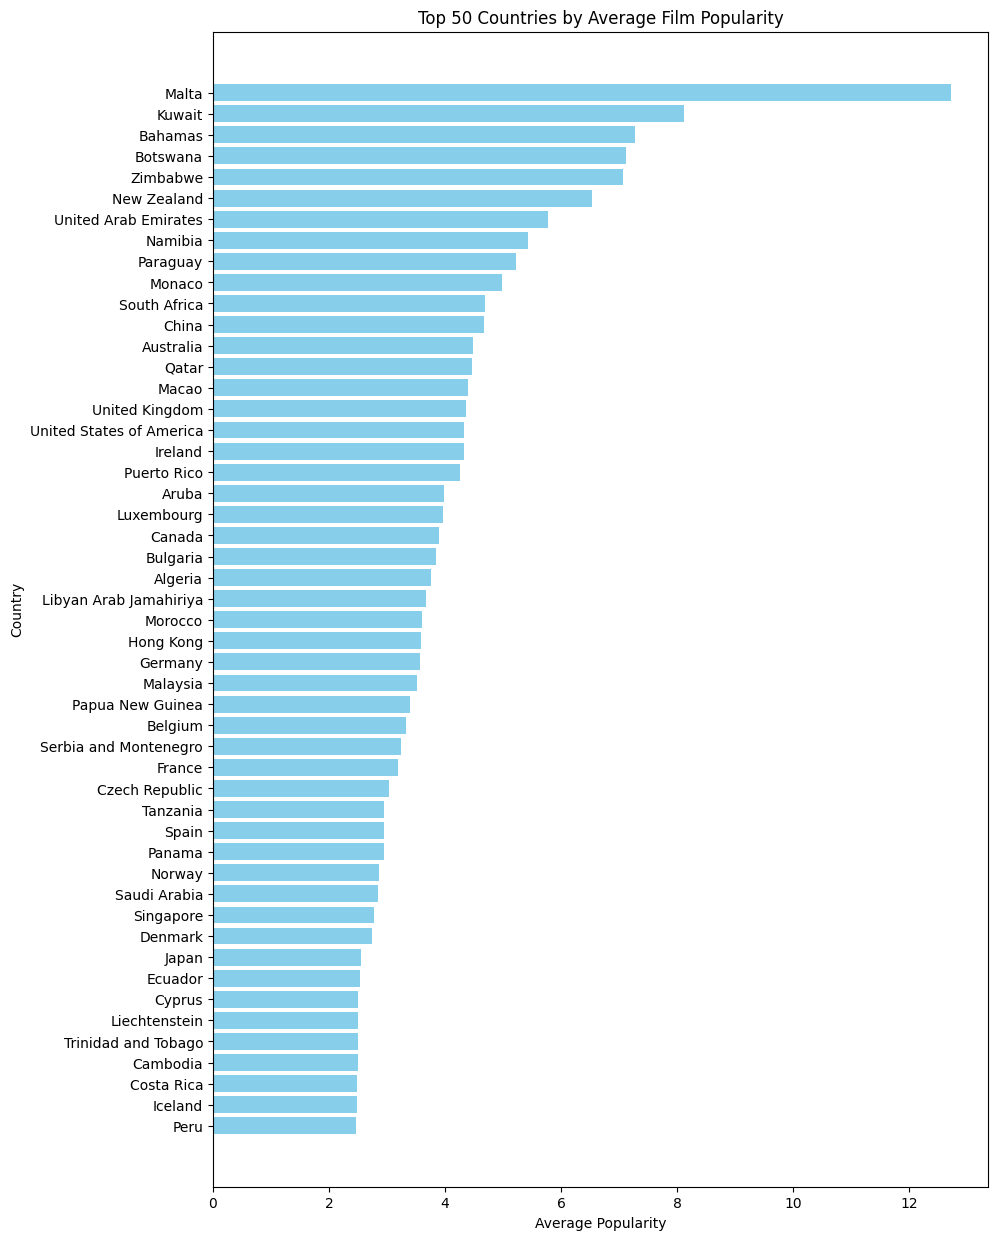

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load your data here
# data = pd.read_csv('final_processed_movies.csv')

# Make sure the 'country_list' is evaluated from string to literal list using ast.literal_eval
data['country_list'] = data['country_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else x)

# Explode the 'country_list' so each country has its own row
exploded_data = data.explode('country_list')

# Ensure 'popularity' is treated as a numeric column
exploded_data['popularity'] = pd.to_numeric(exploded_data['popularity'], errors='coerce')

# Group by country and calculate the mean of the 'popularity'
country_popularity = exploded_data.groupby('country_list')['popularity'].mean().reset_index()

# Sort the countries by the average popularity in descending order and take the top 50
top_countries_popularity = country_popularity.sort_values('popularity', ascending=False).head(50)

# Plot the results as a horizontal bar chart
plt.figure(figsize=(10, 15))
plt.barh(top_countries_popularity['country_list'], top_countries_popularity['popularity'], color='skyblue')
plt.xlabel('Average Popularity')
plt.ylabel('Country')
plt.title('Top 50 Countries by Average Film Popularity')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest popularity at the top
plt.show()


# 4. Time Series Analysis of Movie Releases and Revenue Over Years

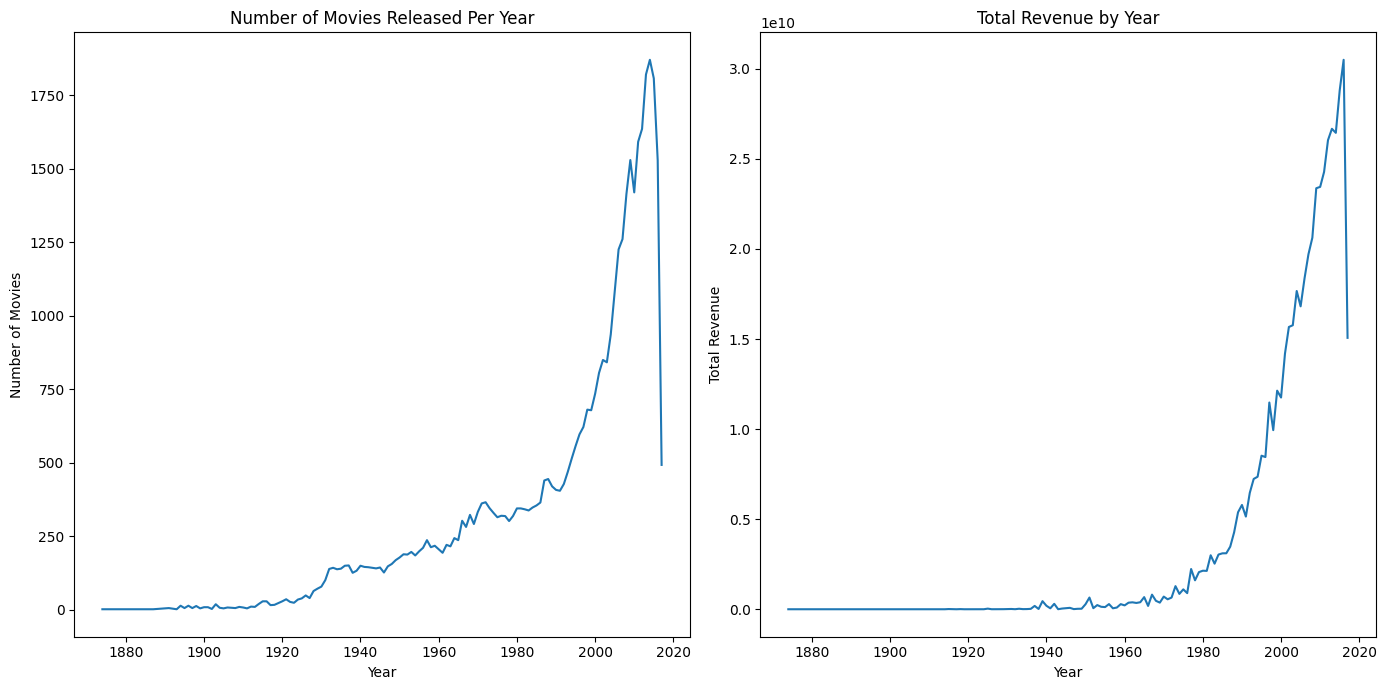

In [157]:
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
yearly_data = data.groupby('release_year').agg({'title': 'count', 'revenue': 'sum'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_data.index, y=yearly_data['title'])
plt.title('Number of Movies Released Per Year')
plt.ylabel('Number of Movies')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.lineplot(x=yearly_data.index, y=yearly_data['revenue'])
plt.title('Total Revenue by Year')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

5. Interactive Bubble Chart of Genres by Popularity and Revenue

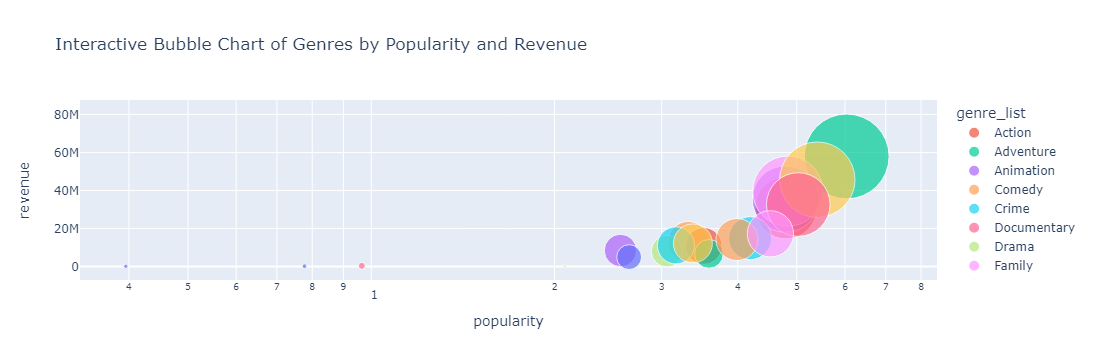

In [158]:
data['genre_list'] = data['genre_list'].str.strip('[]').str.replace("'", "").str.split(', ')
genre_data_exploded = data.explode('genre_list')
genre_data_exploded['popularity'] = genre_data_exploded['popularity'].astype(float)
genre_data_exploded['revenue'] = genre_data_exploded['revenue'].astype(float)

# Grouping data by genre and calculating average popularity and revenue
genre_summary = genre_data_exploded.groupby('genre_list').agg({'popularity': 'mean', 'revenue': 'mean'}).reset_index()

# Creating the interactive bubble chart
fig = px.scatter(genre_summary, x="popularity", y="revenue", size="revenue", color="genre_list", hover_name="genre_list",
                 log_x=True, size_max=60, title="Interactive Bubble Chart of Genres by Popularity and Revenue")
fig.show()

In [159]:
# Load data
database = pd.read_csv('final_processed_movies.csv',header=0)
#data1.columns = data1.iloc[0]  # Set the first row as the column header
#data1 = data1[1:]  # Remove the first row from the data

6. Box Plot of Movie ratings by Genre

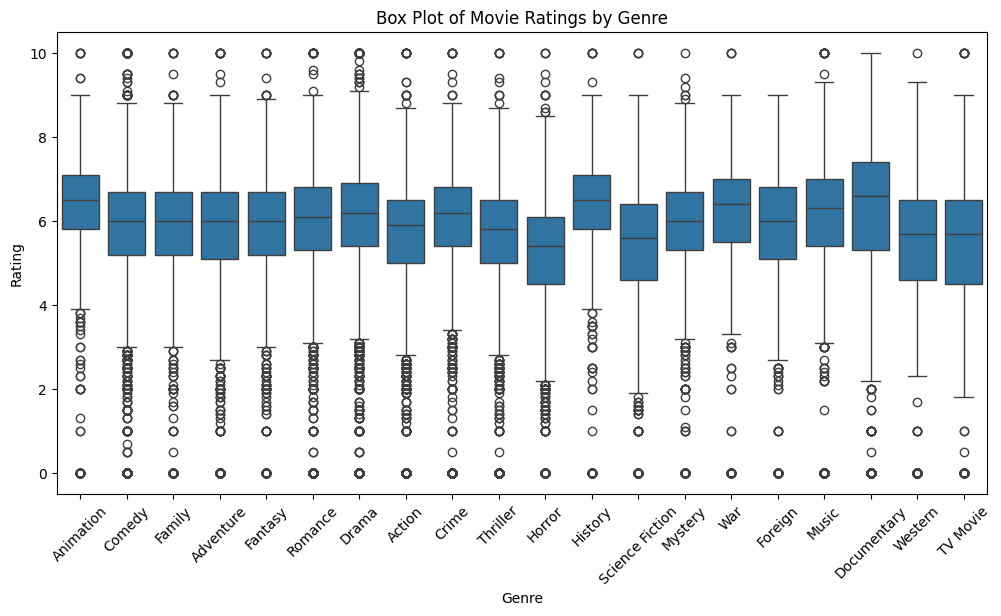

In [160]:
# Convert 'genre_list' from string of list to actual list and explode it
data = database.copy()
data['genre_list'] = data['genre_list'].apply(eval)
data_exploded = data.explode('genre_list')

# Reset the index after exploding the data
data_exploded = data_exploded.reset_index(drop=True)

# Convert 'vote_average' to numeric for plotting
data_exploded['vote_average'] = pd.to_numeric(data_exploded['vote_average'], errors='coerce')

# Creating a box plot of movie ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_list', y='vote_average', data=data_exploded)
plt.xticks(rotation=45)  # Rotate genre labels for better visibility
plt.title('Box Plot of Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

7. Stacked Bar Chart of Movies released per Year by genre

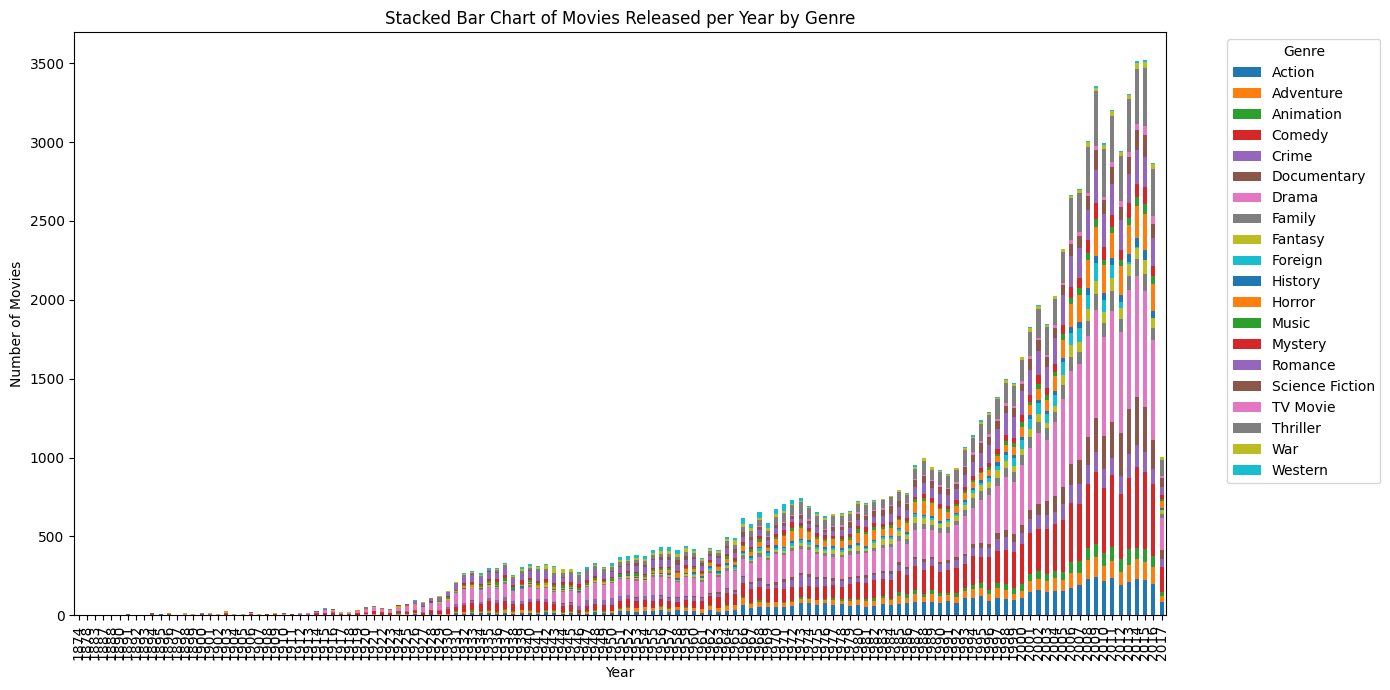

In [161]:
# Convert 'genre_list' from string of list to actual list
data = database.copy()
data['genre_list'] = data['genre_list'].apply(lambda x: eval(x))

# Exploding 'genre_list' so each genre gets its own row
data_exploded = data.explode('genre_list')

# Creating a new column 'release_year' extracted from 'release_date'
data_exploded['release_year'] = pd.to_datetime(data_exploded['release_date']).dt.year

# Creating a crosstab of the number of movies released per year for each genre
genre_year_data = pd.crosstab(data_exploded['release_year'], data_exploded['genre_list'])

# Plotting directly without calling plt.figure() separately
genre_year_data.plot(kind='bar', stacked=True, figsize=(14, 7), legend=True, title='Stacked Bar Chart of Movies Released per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

8. Density Plot of Movie Budgets and Revenues

C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:21: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:22: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:30: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\reyno\AppData\Local\Temp\ipykernel_14952\222574547.py:31: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




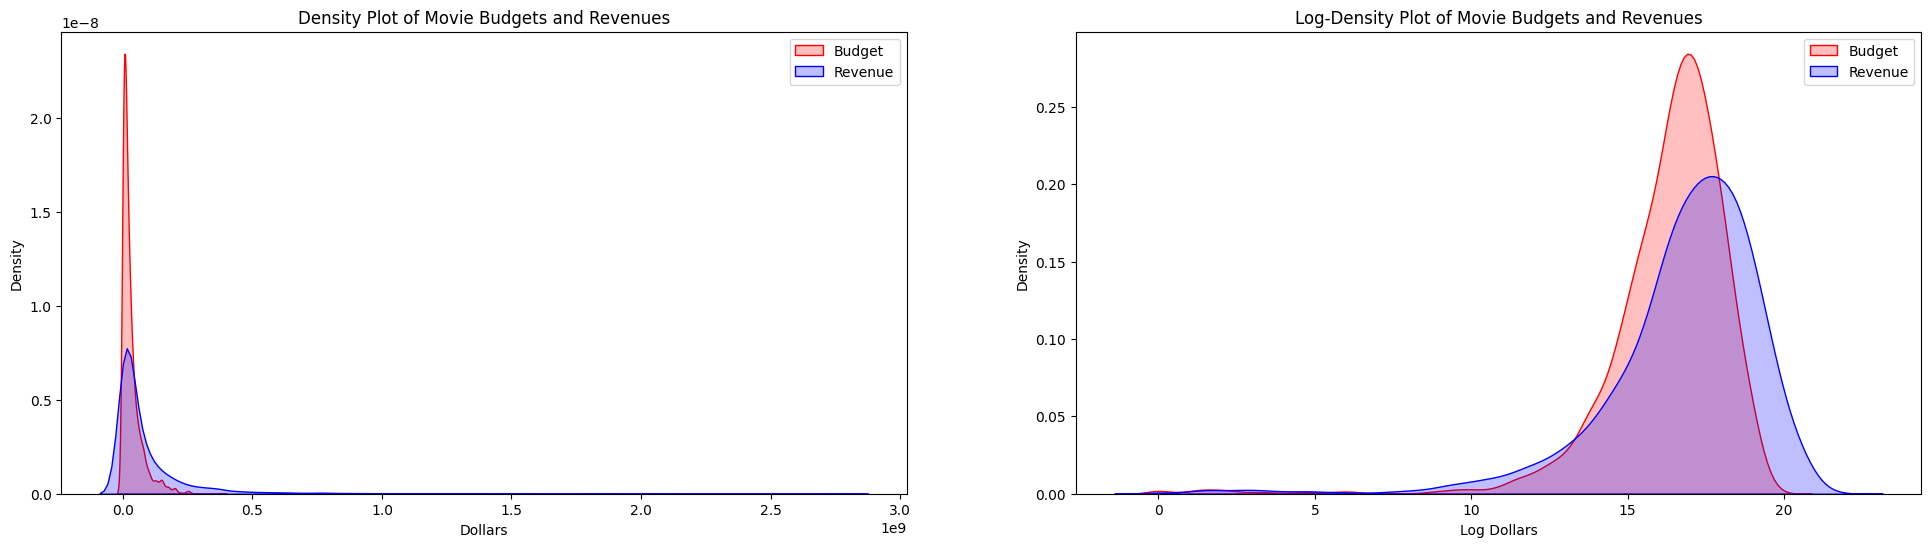

In [162]:
# Convert 'budget' and 'revenue' to numeric, coercing errors
data = database.copy()
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Drop NaN values specifically in 'budget' and 'revenue' columns
data = data.dropna(subset=['budget', 'revenue'])

# Filter out entries where budget or revenue is zero, as these do not contribute to meaningful density information
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Applying log transformation to manage wide distribution
data['log_budget'] = np.log(data['budget'])
data['log_revenue'] = np.log(data['revenue'])

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# Plot 1: Normal density plot
plt.subplot(1, 2, 1)
sns.kdeplot(data['budget'], shade=True, color="r", label="Budget")
sns.kdeplot(data['revenue'], shade=True, color="b", label="Revenue")
plt.title('Density Plot of Movie Budgets and Revenues')
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.legend()

# Plot 2: Log-density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data['log_budget'], shade=True, color="r", label="Budget")
sns.kdeplot(data['log_revenue'], shade=True, color="b", label="Revenue")
plt.title('Log-Density Plot of Movie Budgets and Revenues')
plt.xlabel('Log Dollars')
plt.ylabel('Density')
plt.legend()

plt.show()

9. Network Graph of Co-occurrences of Genres in Movies

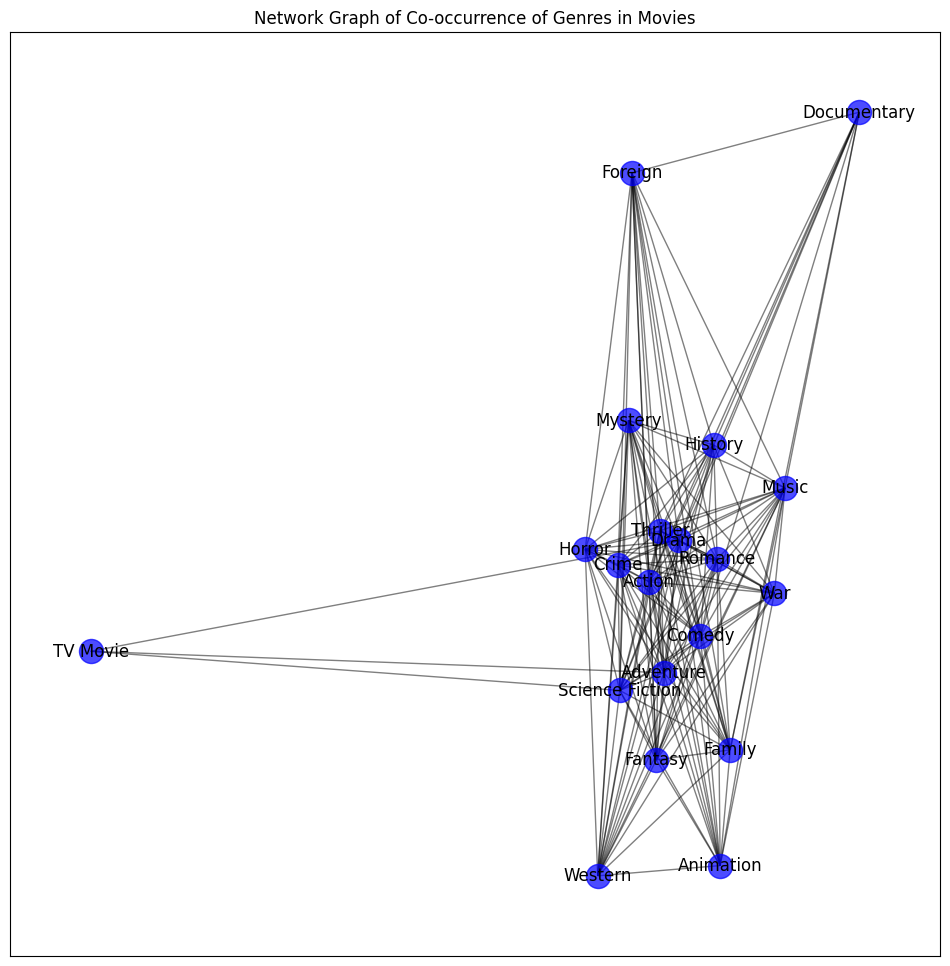

In [163]:
# Convert 'genre_list' from string of list to actual list
data['genre_list'] = data['genre_list'].apply(eval)

# Initialize graph
G = nx.Graph()

# Add nodes and edges from the 'genre_list'
for index, row in data.iterrows():
    genres = row['genre_list']
    for genre in genres:
        if not G.has_node(genre):
            G.add_node(genre)
    for i in range(len(genres)):
        for j in range(i + 1, len(genres)):
            if G.has_edge(genres[i], genres[j]):
                # Increment the weight by 1 if the edge already exists
                G[genres[i]][genres[j]]['weight'] += 1
            else:
                # Add a new edge with weight 1 if it doesn't exist
                G.add_edge(genres[i], genres[j], weight=1)

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('Network Graph of Co-occurrence of Genres in Movies')
plt.show()